## Part 1: Obtaining Data
- Download MNIST dataset
- Examine images and labels

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [26]:
# Gather the MNIST dataset 
mnist = tf.keras.datasets.mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
# Verify the length of the datasets
print(len(x_train))
print(len(x_test))

60000
10000


In [28]:
# Verify an individual image array 28 x 28
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

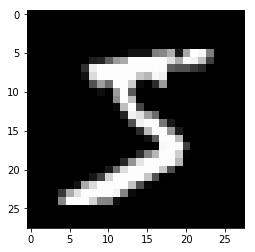

In [5]:
# Visualize an individual image
plt.imshow(x_train[0], cmap='gray')

In [6]:
print(y_train[0])

5


7


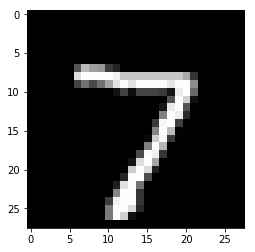

In [7]:
# Verify test data is different from the training data
plt.imshow(x_test[0], cmap='gray')
print(y_test[0])

## Part 2: Layers
- Convolution Layer
- Flatten Layer
- Dense Layer

In [9]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras import Model

In [10]:
class MNISTModel(Model):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.dense1 = Dense(128, activation='relu') # for each output from convolution layer, there are 4 outputs
        self.dense2 = Dense(10, activation='softmax') # 10 outputs for each of the possible digits, softmax is used to calculate the probabilty of each output
        
    def call(self, x):
        x1 = self.conv1(x) # Storing the 32 outputs into the x1
        x2 = self.flatten(x1) # Flatten the 32 outputs into x2
        x3 = self.dense1(x2) # Calculate the possible outputs from the flattened array
        return self.dense2(x3) # Calculate the maximum probability of the outputs

In [14]:
# Create the MNISTModel
model = MNISTModel()

In [ ]:
#kernel_size = 3
#activation = 'relu'
#filters = 32

# Apply filters to abstract the image and reduce the size
#Conv2D(filters, kernel_size=kernel_size, activation=activation)

In [ ]:
# Purpose is to take a 2D array and flatten it into a 1D array
#Flatten()

In [ ]:
# No. of neurons should correspond to the number of outputs
# Activation should be 'relu' unless its the last one which will be 'softmax' (softmax is used to calculate the density)
#Dense(neurons, activation)

## Part 3: Loss and Optimizer
- Add a loss function
- Add an optimizer function
- Add a way to measure loss and accuracy

In [15]:
# Calculate the overall loss depending on which category the current output creates
# Minimizes the possibility that the output belongs to more than 1 category (we only want it to belong to 1)
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

# Adam optimizer modifies the learning rate accordingly depending on how well the accuracy is increasing
# If accuracy is increasing a lot, increase learning rate arrive at the correct answer faster
# If the accuracy is not increasing a lot, decrease the learning rate to get more granularity
optimizer = tf.keras.optimizers.Adam()

In [16]:
# The different labels allow you to monitor changes in tf.board or other monitoring options
# Takes the average of the overall losses in the training run
train_loss = tf.keras.metrics.Mean(name='train_loss')

# Matches the loss type because the output should only correspond to one category at a time
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

In [17]:
# Takes the average of the overall losses in the test run
test_loss = tf.keras.metrics.Mean(name='test_loss')

# Matches the loss type because the output should only correspond to one category at a time
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

## Part 4: Train and Test Step
- Add the function to run when training the model (will modify the weights)
- Add the function to run when testing the model (will not modify weights)

In [18]:
@tf.function
def train_step(inputs, outputs):
    # GradientTape is used to apply the gradient and change the weights and biases
    with tf.GradientTape() as tape:
        # Getting the model outputs based on the current weights and biases
        predictions = model(inputs)
        # Calculate the loss based on what the model is outputting and the expected output
        # Want to minimize this loss but need to know what it is in the first place
        loss = loss_function(outputs, predictions)
    # trainable_variables fields are from the Model class
    # Calculate new trainable variables to try to minimize the loss
    gradients = tape.gradient(loss, model.trainable_variables)
    # Use the optimizer to apply the new weights and biases to modify the graph and get a lower loss
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    # Calculate the current loss and accuracy
    train_loss(loss)
    train_accuracy(outputs, predictions)

In [19]:
@tf.function
def test_step(inputs, outputs):
    # Getting the model outputs based on the current weights and biases
    predictions = model(inputs)
    # Calculate the loss based on what the model is outputting and the expected output
    loss = loss_function(outputs, predictions)

    
    # Calculate the current loss and accuracy
    test_loss(loss)
    test_accuracy(outputs, predictions)

## Part 5: Formatting Data
- Usually happens when you gather the data
- Format inputs and outputs

In [ ]:
# Normalize the data to be between 0 and 1 (In this dataset, its 255 since the values go between 0 and 255)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [33]:
# Change the way the data is formatted so that it has another dimension so the result of each array is in another dimension
# Change each element in an array to be its own array
# Input needs to be in 4 dimensions 
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [34]:
x_train[0]

array([[[[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]]],


       [[[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

        [[0.        ]],

In [32]:
# Slicing up the data, shuffling by 10,000 and then returning batches of 32
# Tries to prevent overfitting and false positives
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)

# Attempt to feed in batches of 32 since the dataset is large
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

## Part 6: Training
- Write the train loop
- Train and evaluate the model

In [35]:
epochs = 5

for epoch in range(epochs):
    for train_inputs, train_labels in train_data:
        train_step(train_inputs, train_labels)
        
    for test_inputs, test_labels in test_data:
        test_step(test_inputs, test_labels)
        
    template = 'Epochs: {}, Train Loss: {}, Train Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    print(template.format(epoch+1, train_loss.result(), train_accuracy.result(), test_loss.result(), test_accuracy.result()))
          
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epochs: 1, Train Loss: 0.1342819482088089, Train Accuracy: 0.959933340549469, Test Loss: 0.06557536125183105, Test Accuracy: 0.978600025177002
Epochs: 2, Train Loss: 0.04153291881084442, Train Accuracy: 0.9872666597366333, Test Loss: 0.05793168768286705, Test Accuracy: 0.9807999730110168
Epochs: 3, Train Loss: 0.02179376594722271, Train Accuracy: 0.993066668510437, Test Loss: 0.05405556410551071, Test Accuracy: 0.9829000234603882
Epochs: 4, Train Loss: 0.013260572217404842, Train Accuracy: 0.99581664800

The training and testing accuracy after one epoch was already around 97%. Therefore, we did not need to run it too many times to see a slight improvement. Anything over 90% is already a pretty well trained model.